# Introduction

Since Jan. 1, 2015, [The Washington Post](https://www.washingtonpost.com/) has been compiling a database of every fatal shooting in the US by a police officer in the line of duty.

<center><img src=https://i.imgur.com/sX3K62b.png></center>

While there are many challenges regarding data collection and reporting, The Washington Post has been tracking more than a dozen details about each killing. This includes the race, age and gender of the deceased, whether the person was armed, and whether the victim was experiencing a mental-health crisis. The Washington Post has gathered this supplemental information from law enforcement websites, local new reports, social media, and by monitoring independent databases such as "Killed by police" and "Fatal Encounters". The Post has also conducted additional reporting in many cases.

There are 4 additional datasets: US census data on poverty rate, high school graduation rate, median household income, and racial demographics. [Source of census data](https://factfinder.census.gov/faces/nav/jsf/pages/community_facts.xhtml).

### Upgrade Plotly



In [1]:
%pip install --upgrade plotly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.6/15.6 MB 45.2 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.15.0
    Uninstalling plotly-5.15.0:
      Successfully uninstalled plotly-5.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.


## Import Statements

In [2]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# This might be helpful:
from collections import Counter

## Notebook Presentation

In [3]:
pd.options.display.float_format = '{:,.2f}'.format

## Load the Data

In [4]:
df_hh_income = pd.read_csv('Median_Household_Income_2015.csv', encoding="windows-1252")
df_pct_poverty = pd.read_csv('Pct_People_Below_Poverty_Level.csv', encoding="windows-1252")
df_pct_completed_hs = pd.read_csv('Pct_Over_25_Completed_High_School.csv', encoding="windows-1252")
df_share_race_city = pd.read_csv('Share_of_Race_By_City.csv', encoding="windows-1252")
df_fatalities = pd.read_csv('Deaths_by_Police_US.csv', encoding="windows-1252")

# Preliminary Data Exploration

* Shape of the DataFrames?
* Number of rows and columns?
* The column names?
* Any NaN values or duplicates?

In [5]:
df_hh_income.info()
df_pct_poverty.info()
df_pct_completed_hs.info()
df_share_race_city.info()
df_fatalities.info()
df_fatalities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29322 entries, 0 to 29321
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Geographic Area  29322 non-null  object
 1   City             29322 non-null  object
 2   Median Income    29271 non-null  object
dtypes: object(3)
memory usage: 687.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Geographic Area  29329 non-null  object
 1   City             29329 non-null  object
 2   poverty_rate     29329 non-null  object
dtypes: object(3)
memory usage: 687.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Geographic Area       29329 non-null 

## Data Cleaning - Check for Missing Values and Duplicates

Consider how to deal with the NaN values. Perhaps substituting 0 is appropriate.

In [6]:
df_hh_income.duplicated().values.any()
df_pct_poverty.duplicated().values.any()
df_pct_completed_hs.duplicated().values.any()
df_share_race_city.duplicated().values.any()
df_fatalities.duplicated().values.any()
df_fatalities.duplicated().values.any()

False

In [7]:
df_hh_income.fillna(0, inplace=True)
df_pct_poverty.fillna(0, inplace=True)

# Poverty Rate in each US State



In [13]:
old_value = '-'
new_value = 0
df_pct_poverty['poverty_rate'] = df_pct_poverty['poverty_rate'].replace(old_value, new_value)

df_pct_poverty.poverty_rate = pd.to_numeric(df_pct_poverty.poverty_rate)
df_pct_poverty['Average Poverty Rate'] = df_pct_poverty.groupby('Geographic Area')['poverty_rate'].transform('mean')
df_pct_poverty = df_pct_poverty.drop(columns=['Average Poverty Rate', 'City'])

pov_rank_unsort = df_pct_poverty.drop_duplicates(subset=['Geographic Area'])
pov_rank = pov_rank_unsort.sort_values('poverty_rate', ascending=False)
pov_rank_unsort


,Geographic Area,poverty_rate
0,AL,78.80
585,AK,39.30
940,AZ,57.40
1391,AR,18.90
1932,CA,2.50
3454,CO,5.10
3912,CT,19.00
4056,DE,1.50
4133,DC,18.00
4134,FL,33.60


In [10]:
bar = px.bar(x=pov_rank['Geographic Area'],
             y=pov_rank.poverty_rate,
             title='Poverty Rate in each US State',
             text_auto=True
             )

bar.update_layout(xaxis_title= 'US States',
                  yaxis_title='Poverty Rate',
                  font=dict(size=18),
                  )
bar.show()

# High School Graduation Rate by US State


In [28]:
df_pct_completed_hs
old_value = '-'
new_value = 0
# df_pct_completed_hs['percent_completed_hs'] = df_pct_completed_hs['percent_completed_hs'].replace(old_value, new_value)
# df_pct_completed_hs.percent_completed_hs = pd.to_numeric(df_pct_completed_hs.percent_completed_hs)

# df_pct_completed_hs['Average Completion Rate'] = df_pct_completed_hs.groupby('Geographic Area')['percent_completed_hs'].transform('mean')
# df_pct_completed_hs = df_pct_completed_hs.drop(columns=['City'])

hs_rank_unsort = df_pct_completed_hs.drop_duplicates(subset=['Geographic Area'])

hs_rank = hs_rank_unsort.sort_values('Average Completion Rate')

bar2 = px.bar(x=hs_rank['Geographic Area'],
             y=hs_rank['Average Completion Rate'],
             title='High School Graduation Rate by US State',
             text_auto=True,
             )

bar2.update_yaxes(range=[70, 100])

bar2.update_layout(xaxis_title= 'US States',
                  yaxis_title= 'High School Graduation Rate',
                  font=dict(size=18),
                  )
bar2.show()

# Relationship between Poverty Rates and High School Graduation Rates


In [32]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(go.Scatter(x=pov_rank_unsort['Geographic Area'], y=pov_rank_unsort.poverty_rate, name='Poverty Ratio'), secondary_y=False)
fig.add_trace(go.Scatter(x=hs_rank_unsort['Geographic Area'], y=hs_rank_unsort['Average Completion Rate'], name='Graduation Ratio'), secondary_y=True)

fig.update_layout(
    title_text='Relationship between Poverty Rates and High School Graduation Rates')

fig.update_xaxes(title_text='US States')

fig.update_yaxes(title_text='Poverty Ratio', secondary_y=False)
fig.update_yaxes(title_text='Graduation Ratio', secondary_y=True)

fig.show()

#### Using a Seaborn .jointplot() with a Kernel Density Estimate (KDE) and scatter plot to visualise the same relationship

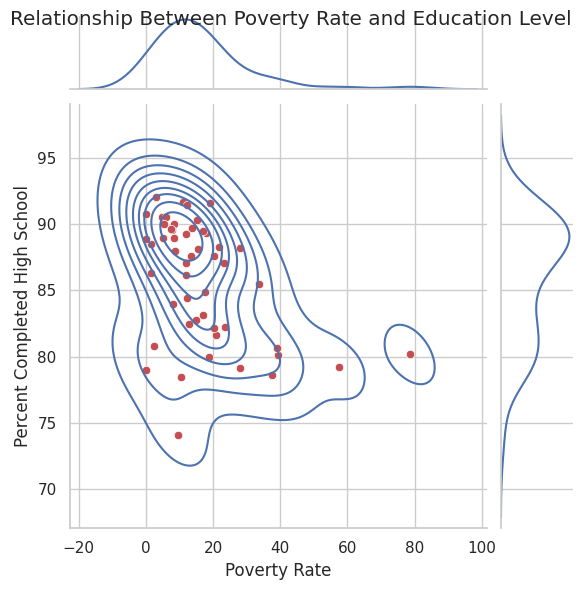

In [56]:
df_merged = pd.merge(pov_rank_unsort, hs_rank_unsort, on='Geographic Area', how='inner')

sns.set(style="whitegrid")
g = sns.jointplot(x=df_merged["poverty_rate"], y=df_merged['Average Completion Rate'], color="b", kind='kde')

sns.scatterplot(x=pov_rank_unsort["poverty_rate"], y=hs_rank_unsort['Average Completion Rate'], ax=g.ax_joint, color="r")

g.ax_joint.set_xlabel("Poverty Rate")
g.ax_joint.set_ylabel("Percent Completed High School")
g.fig.suptitle("Relationship Between Poverty Rate and Education Level")

plt.show()

#### Seaborn's `.lmplot()` or `.regplot()` to show a linear regression between the poverty ratio and the high school graduation ratio.

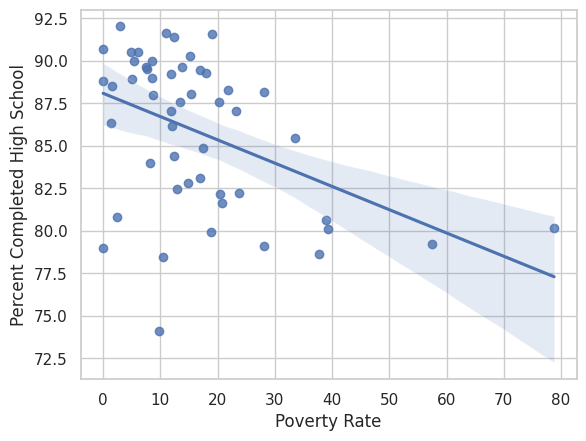

In [66]:
sns.set(style="whitegrid")
h = sns.regplot(data=df_merged, x=df_merged["poverty_rate"], y=df_merged['Average Completion Rate'])

h.set_xlabel("Poverty Rate")
h.set_ylabel("Percent Completed High School")

plt.show()

# Subsections Showing the Racial Makeup of Each US State


In [ ]:
old_value = '(X)'
new_value = 0
df_share_race_city['share_white'] = df_share_race_city['share_white'].replace(old_value, new_value)
df_share_race_city['share_black'] = df_share_race_city['share_black'].replace(old_value, new_value)
df_share_race_city['share_native_american'] = df_share_race_city['share_native_american'].replace(old_value, new_value)
df_share_race_city['share_asian'] = df_share_race_city['share_asian'].replace(old_value, new_value)
df_share_race_city['share_hispanic'] = df_share_race_city['share_hispanic'].replace(old_value, new_value)

df_share_race_city.share_white = pd.to_numeric(df_share_race_city.share_white)
df_share_race_city.share_black = pd.to_numeric(df_share_race_city.share_black)
df_share_race_city.share_native_american = pd.to_numeric(df_share_race_city.share_native_american)
df_share_race_city.share_asian = pd.to_numeric(df_share_race_city.share_asian)
df_share_race_city.share_hispanic = pd.to_numeric(df_share_race_city.share_hispanic)

state_data = df_share_race_city.groupby('Geographic area').sum()

subsections = ['share_white', 'share_black', 'share_native_american', 'share_asian', 'share_hispanic']

plt.figure(figsize=(12, 6))
bottom = None

for col in subsections:
    plt.bar(state_data.index, state_data[col], label=col, bottom=bottom)
    if bottom is None:
        bottom = state_data[col]
    else:
        bottom += state_data[col]

plt.xlabel('State')
plt.ylabel('Population Share')
plt.title('Population Share by Ethnicity in Each U.S. State')
plt.legend(title='Ethnicity', loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

# People Killed by Race


In [ ]:
df_fatalities["race"].replace({'W':'White, non-Hispanic'}, inplace = True)
df_fatalities["race"].replace({'B':'Black, non-Hispanic'}, inplace = True)
df_fatalities["race"].replace({'A':'Asian'}, inplace = True)
df_fatalities["race"].replace({'N':'Native American'}, inplace = True)
df_fatalities["race"].replace({'H':'Hispanic'}, inplace = True)
df_fatalities["race"].replace({'O':'Other'}, inplace = True)
df_fatalities["race"].replace({'U':'Unknown'}, inplace = True)

race_fatal = df_fatalities.race.value_counts()
pie = px.pie(values=race_fatal.values,
             labels=race_fatal.values,
             names=race_fatal.index,
             hole=0.6,
             title='Number of People Killed by Race')
pie.update_traces(textposition='outside',
                  textinfo='percent+label')

pie.show()

# Total Number of Deaths of Men and Women



In [ ]:
df_fatalities
gender_fatal = df_fatalities.gender.value_counts()
pie2 = px.pie(values=gender_fatal.values,
             labels=gender_fatal.values,
             names=gender_fatal.index,
             hole=0.6,
             title='Total Number of Deaths of Men and Women')
pie2.update_traces(textposition='outside',
                  textinfo='percent+label')

pie2.show()

# Age and Manner of Death


In [ ]:
df_fatalities
gender_manner = df_fatalities.groupby(['gender', 'manner_of_death'], as_index=False).agg({'id': pd.Series.count})
gender_manner

box = px.box(gender_manner,
             x='gender',
             y='id',
             color='manner_of_death',
             notched=True,
             points='all',
             title='Difference between Men and Women in the Manner of death')
box.update_layout(yaxis=dict(type='log'),
                  xaxis_title='Gender',
                  yaxis_title='Manner of death')
box.show()
gender_manner


# Kinds of weapon (if any) the deceased was carrying

In [ ]:
df_fatalities
armed_fatal = df_fatalities.armed.value_counts()
armed_fatal

pie3 = px.pie(values=armed_fatal.values,
             labels=armed_fatal.values,
             names=armed_fatal.index,
             hole=0.6,
             title='Percentage of police killings armed')
pie3.update_traces(textposition='inside',
                  textinfo='percent+label')

pie3.show()


# Percentage of People Killed?

In [ ]:
df_fatalities
under25_fatal = df_fatalities.query('age<25')
pct_under25 = len(df_fatalities) / len(under25_fatal)
print(f'Percentage of people killed under 25 years old is: {pct_under25:.2f}%')

Create a histogram and KDE plot that shows the distribution of ages of the people killed by police.

In [ ]:
hist = px.histogram(df_fatalities,
                    x='age',
                    text_auto=True,
                    marginal='box',
                    title='Distribution of ages of the people killed by police'
                    )
hist.update_layout(xaxis_title='Age',
                   yaxis_title='Count')
hist.show()

plt.figure(dpi=200)
sns.kdeplot(df_fatalities,
            x='age',
            fill=True,
            )

plt.title('Distribution of ages of the people killed by police')
plt.show()

Create a seperate KDE plot for each race. Is there a difference between the distributions?

In [ ]:
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
sns.kdeplot(data=df_fatalities, x='age', hue='race', fill=True, common_norm=False, legend=True)
plt.xlabel('Age')
plt.title('KDE Plot of Age Distribution by Race')
plt.legend(title='Race', title_fontsize='12')
plt.show()

# Race of People Killed



In [ ]:
df_fatalities["race"].replace({'W':'White, non-Hispanic'}, inplace = True)
df_fatalities["race"].replace({'B':'Black, non-Hispanic'}, inplace = True)
df_fatalities["race"].replace({'A':'Asian'}, inplace = True)
df_fatalities["race"].replace({'N':'Native American'}, inplace = True)
df_fatalities["race"].replace({'H':'Hispanic'}, inplace = True)
df_fatalities["race"].replace({'O':'Other'}, inplace = True)
df_fatalities["race"].replace({'U':'Unknown'}, inplace = True)

race_fatal = df_fatalities.race.value_counts()
pie = px.pie(values=race_fatal.values,
             labels=race_fatal.values,
             names=race_fatal.index,
             hole=0.6,
             title='Number of People Killed by Race')
pie.update_traces(textposition='outside',
                  textinfo='percent+label')

pie.show()

# Mental Illness and Police Killings


In [ ]:
df_fatalities.signs_of_mental_illness.describe()
mental_count = df_fatalities.signs_of_mental_illness.value_counts()
pie4 = px.pie(values=mental_count.values,
             labels=mental_count.values,
             names=mental_count.index,
             hole=0.6,
             title='Percentage of people killed by police diagnosed with a mental illness')
pie4.update_traces(textposition='outside',
                  textinfo='percent+label')

pie4.show()

# Top 10 cities with the most police killings

In [ ]:
top10_cities = df_fatalities.city.value_counts()[:10].sort_values(ascending=True)

h_bar = px.bar(x=top10_cities.values,
               y=top10_cities.index,
               orientation='h',
               title='Top 10 cities with the most police killings')

h_bar.update_layout(xaxis_title='Number of killings',
                    yaxis_title='Cities')

h_bar.show()
top10_cities

# Rate of Death by Race


In [ ]:
race_data = df_fatalities.groupby(['city', 'race'], as_index=False).agg({'id':pd.Series.count})
race_data

In [ ]:
cities_to_include = [
    'St. Louis', 'Austin', 'Miami', 'Columbus', 'San Antonio',
    'Las Vegas', 'Chicago', 'Houston', 'Phoenix', 'Los Angeles'
]

filtered_df = race_data[race_data['city'].isin(cities_to_include)]

In [ ]:
pivot_df = filtered_df.pivot_table(index='city', columns='race', values='id', aggfunc='sum', fill_value=0)

ax = pivot_df.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.title('Rate at which people are killed by race for each city.')
plt.xlabel('City')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Race', title_fontsize='12', loc='upper right', bbox_to_anchor=(1.2, 1.0))

plt.show()

# Map of Police Killings by US State



In [ ]:
most_dang = df_fatalities.groupby('state', as_index=False).agg({'id':pd.Series.count})
most_dang

map = px.choropleth(most_dang,
                    locations='state',
                    color='id',
                    scope='usa',
                    locationmode='USA-states',
                    color_continuous_scale="Viridis")

map.update_layout(coloraxis_showscale=True)
map.show()

# Number of Police Killings Over Time



In [ ]:
df_fatalities['date'] = pd.to_datetime(df_fatalities['date'])
killings_by_year = df_fatalities.date.dt.year.value_counts()

plt.figure(figsize=(10, 6))
plt.title('Number of Police Killings Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Killings')
plt.yticks(fontsize=14)
plt.xticks(fontsize=14, ticks=np.arange(2015, 2018, step=1))
plt.plot(killings_by_year.index, killings_by_year.values, marker='o', linestyle='-')

plt.show()

# Epilogue

Now that you have analysed the data yourself, read [The Washington Post's analysis here](https://www.washingtonpost.com/graphics/investigations/police-shootings-database/).